## Show some methods to numerically integrate Gaussian, i.e. to show that

$\int^{+\infty}_{-\infty} e^{-x^2} dx = \sqrt{2\pi}$

In [29]:
import ROOT

In [31]:
lowlim, higlim = -30.,30.
f = ROOT.TF1("mygaus","gaus",lowlim,higlim)
f.SetParameters(1.,0.,1.)    

In [32]:
c1 = ROOT.TCanvas()

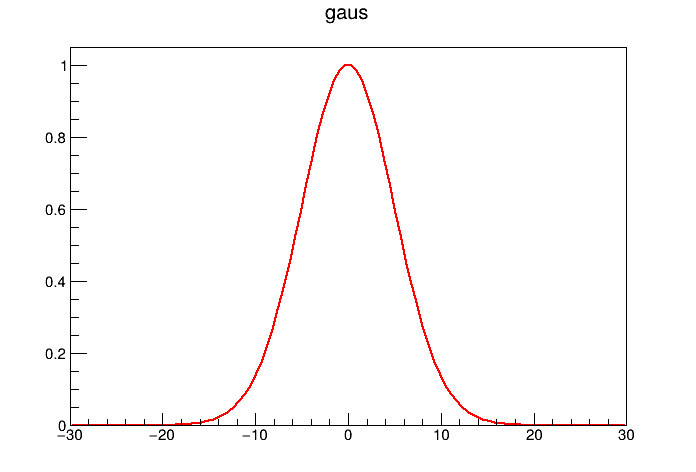

In [34]:
f.SetParameter(2,5.)
f.Draw()
c1.Draw()

In [35]:
f.SetParameter(2,1.)

## 1) Trapez method

In [57]:
def trapez(f, lowlim, higlim, ncalls) :
    if (lowlim > higlim):
        raise Exception('function low limit is larger than high limit')
    integral = 0.
    height = (higlim - lowlim)/ncalls
    for i in range(ncalls-1) :
        one_base = f.Eval(lowlim + i * height)
        other_base = f.Eval(lowlim + (i+1) * height)
        integral += 0.5*(one_base + other_base) * height
    return integral

In [58]:
test1 = trapez(f,lowlim,higlim,50000)

In [59]:
true_value = ROOT.TMath.Sqrt(2.*ROOT.TMath.Pi())
print (f'{test1:.30f} estimate of {true_value:.30f}')

2.506628274630991803917368088150 estimate of 2.506628274631000241612355239340


## 2) Hit-and-miss method

In [65]:
## we need to know the function maximum (1 in this case)
fmax = 1.
tr = ROOT.TRandom3()

def hit_and_miss (f, lowlim, higlim, ncalls) :
    if (lowlim > higlim):
        raise Exception('function low limit is larger than high limit')
    hit = 0
    for i in range(ncalls) :
        r1,r2 = tr.Uniform(lowlim,higlim), tr.Uniform(0.,fmax)
        if (r2 < f.Eval(r1)) :
            hit += 1
    return (hit / ncalls) * ( highlim - lowlim ) * fmax

In [74]:
test2 = hit_and_miss(f,lowlim,higlim,10_000_000)

In [75]:
print (f'{test2:.30f} estimate of {true_value:.30f}')

2.506140000000000256363819062244 estimate of 2.506628274631000241612355239340
